In [1]:
# Problem Statement : To determine whether the client will subscribe to the bank's term deposit or not.

In [2]:
import numpy as np                                               # importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
bank = pd.read_csv('bank.csv')                                   # read the csv file

In [4]:
bank.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [5]:
# Data is not seperated. Rather it is cluttered. So fixing this..

In [6]:
bank = pd.read_csv('bank.csv', sep=';')

In [7]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
# data is now readable and properly seperated

In [9]:
# missing value analysis

In [10]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [11]:
# no null values are present

In [12]:
bank.shape

(41188, 21)

In [13]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [14]:
# Primary Analysis of categorical features

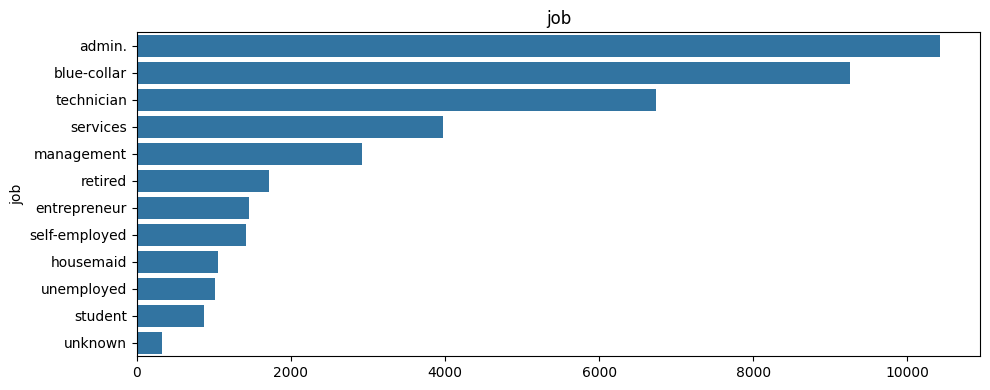

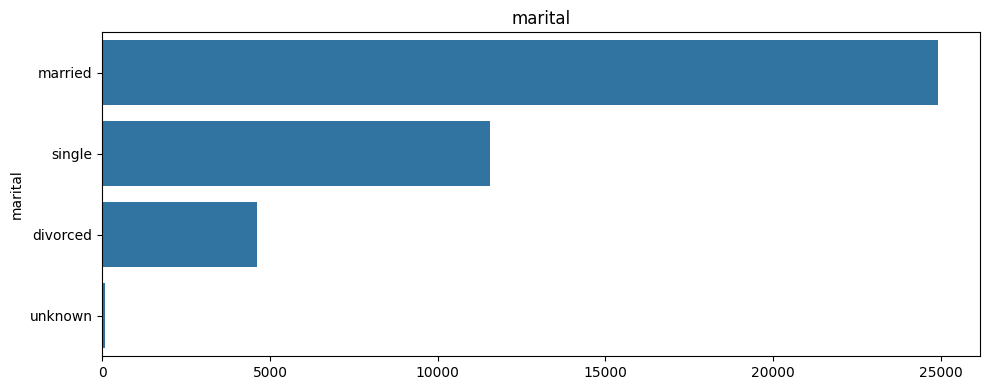

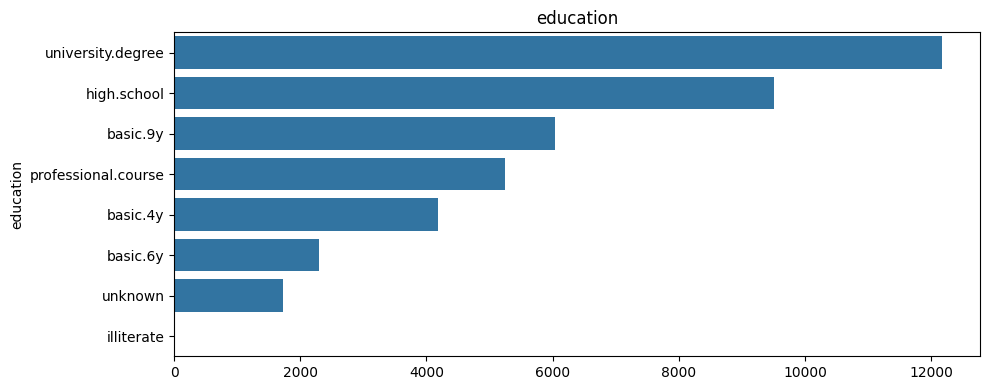

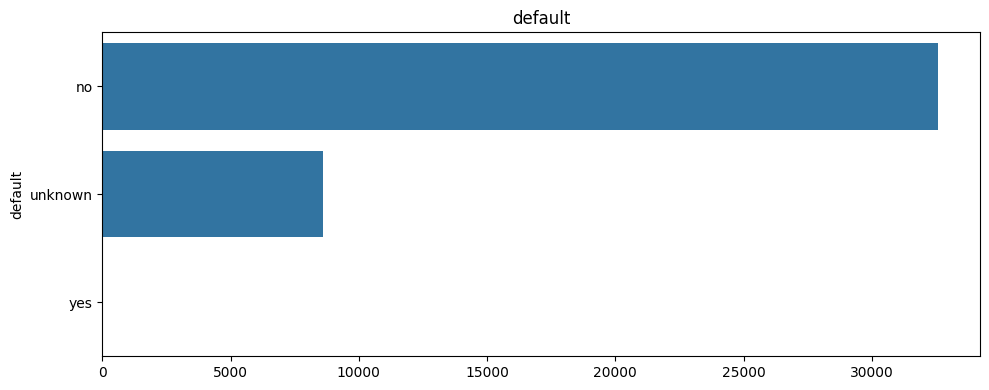

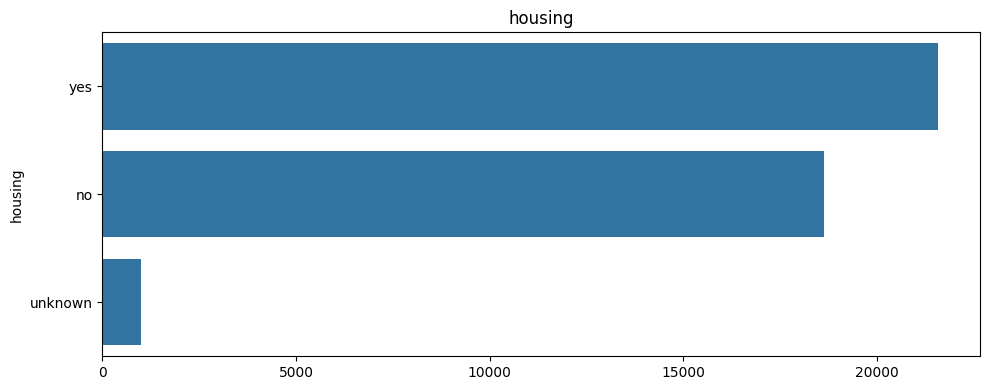

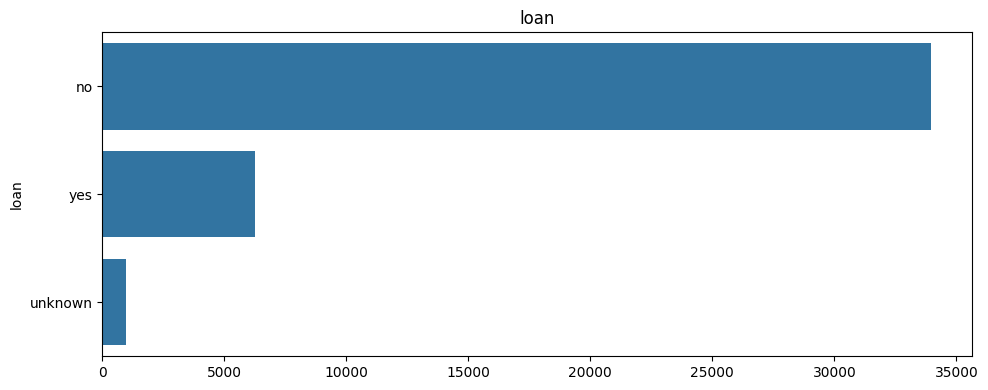

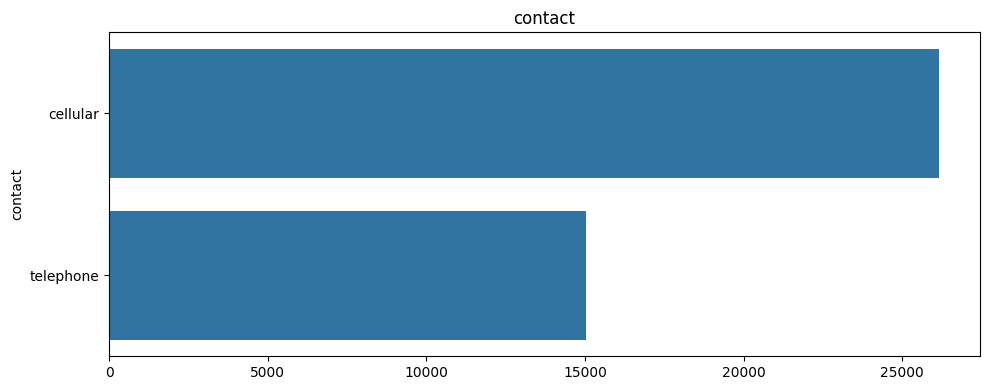

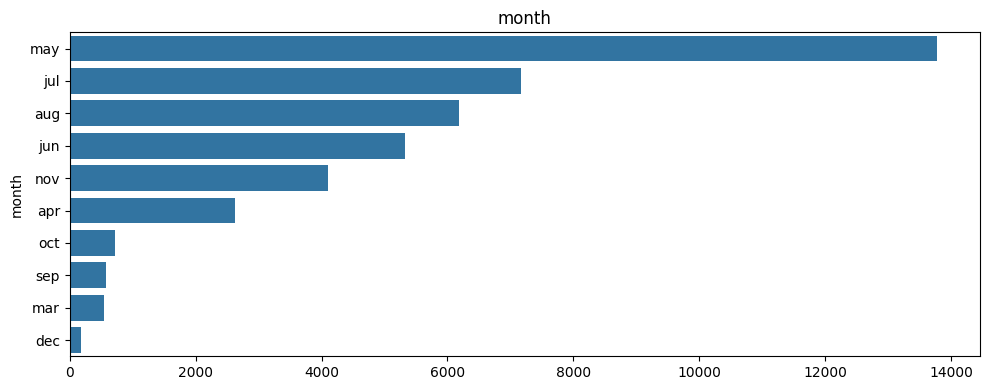

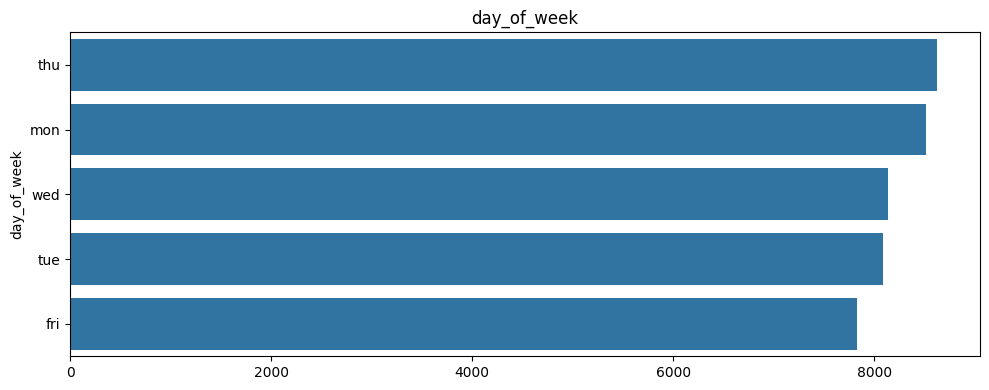

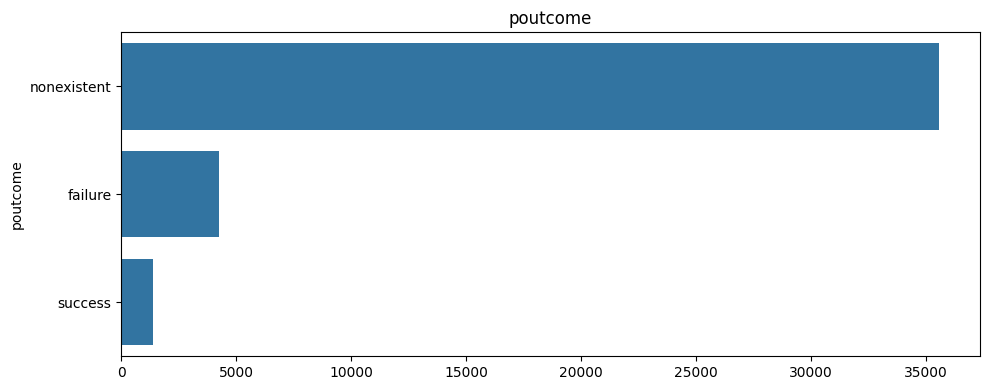

In [15]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

for i in categorical_features:
    plt.figure(figsize = (10,4))
    sns.barplot(x = bank[i].value_counts().values, y = bank[i].value_counts().index)
    plt.title(i)
    plt.tight_layout()                    # tight_layout gives layout in one single output

In [16]:
# Primary Analysis of numerical features

In [17]:
numerical_features = [x for x in bank.columns.to_list() if x not in categorical_features]

In [18]:
numerical_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [19]:
print('Categorical features: ', categorical_features)
print(' \n Numerical features: ', numerical_features)

Categorical features:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
 
 Numerical features:  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


In [20]:
numerical_features.remove('y')

In [21]:
numerical_features

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [22]:
print('Categorical features: ', categorical_features)
print(' \n Numerical features: ', numerical_features)

Categorical features:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
 
 Numerical features:  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


<Axes: xlabel='y', ylabel='count'>

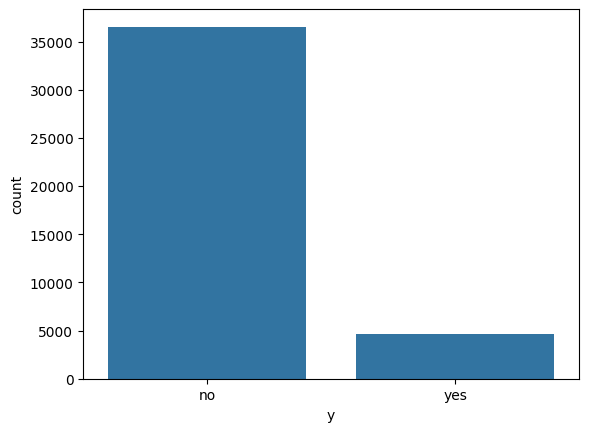

In [23]:
sns.countplot(x = bank['y'])

In [24]:
bank['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [25]:
# Label encoding only wherever required such that order of the ordinal data is maintained so that the machine generates meaningful true insights.

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [28]:
bank.job = le.fit_transform(bank.job)

In [29]:
bank.marital.value_counts()

marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

In [31]:
bank.marital.replace({'unknown':0, 'single':1, 'married':2, 'divorced':3}, inplace=True)

In [32]:
bank.education.value_counts()

education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

In [33]:
bank.education.replace({'unknown':0, 'illiterate':1, 'basic.4y':2, 'basic.6y':3, 'basic.9y':4, 'high.school':5, 'university.degree':6, 'professional.course':7}, inplace=True)

In [34]:
bank.default.value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [35]:
bank.default.replace({'unknown':0, 'yes':1, 'no':2}, inplace=True)

In [36]:
bank.housing.value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [37]:
bank.housing.replace({'unknown':0, 'yes':1, 'no':2}, inplace=True)

In [38]:
bank.loan.value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

In [39]:
bank.loan.replace({'unknown':0, 'yes':1, 'no':2}, inplace=True)

In [40]:
bank.contact.value_counts()

contact
cellular     26144
telephone    15044
Name: count, dtype: int64

In [41]:
bank.contact = le.fit_transform(bank.contact)

In [42]:
bank.month.value_counts()

month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64

In [43]:
bank.month.replace({'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}, inplace=True)

In [44]:
bank.day_of_week.value_counts()

day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64

In [45]:
bank.day_of_week.replace({'mon':1,'tue':2,'wed':3,'thu':4,'fri':5}, inplace=True)

In [46]:
bank.poutcome.value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

In [47]:
bank.poutcome = le.fit_transform(bank.poutcome)

In [48]:
bank.y.value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [49]:
bank.y.replace({'yes':1,'no':2}, inplace=True)

In [50]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [51]:
# there are no null values and data is of numeric type..so data cleaning is completed

In [52]:
# Sampling

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
train_x, test_x, train_y, test_y = train_test_split(bank.iloc[:,:-1], bank.iloc[:,-1], test_size = .2)

In [55]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(32950, 20)
(32950,)
(8238, 20)
(8238,)


In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rfc = RandomForestClassifier()

In [58]:
# for highlighting the important features using Random Forest

In [59]:
from sklearn.feature_selection import RFE

In [60]:
rfc = RFE(rfc)

In [61]:
rfc.fit(train_x, train_y)

RFE(estimator=RandomForestClassifier())

In [62]:
rfc.support_

array([ True,  True, False,  True, False, False, False, False, False,
        True,  True,  True,  True, False, False, False,  True, False,
        True,  True])

In [63]:
df = pd.DataFrame({'columns':train_x.columns, 'feature_imp':rfc.support_})
df.sort_values('feature_imp', ascending = False)

,columns,feature_imp
0,age,True
9,day_of_week,True
18,euribor3m,True
16,cons.price.idx,True
12,pdays,True
11,campaign,True
1,job,True
10,duration,True
3,education,True
19,nr.employed,True


In [64]:
# Handling unbalanced data using SMOTE technique

In [65]:
from imblearn.over_sampling import SMOTE

In [66]:
smt = SMOTE()

In [67]:
print('Before \n', train_y.value_counts())

train_x_smt, train_y_smt = smt.fit_resample(train_x, train_y)

print('===================================== \n After \n', train_y_smt.value_counts())

Before 
 y
2    29186
1     3764
Name: count, dtype: int64
 After 
 y
2    29186
1    29186
Name: count, dtype: int64


In [68]:
# Standardizing the data

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()

In [71]:
bank1 = scaler.fit_transform(bank)

In [72]:
bank1

array([[ 1.53303429, -0.20157925,  0.2837415 , ...,  0.71245988,
         0.33167991,  0.35630932],
       [ 1.62899323,  0.91122681,  0.2837415 , ...,  0.71245988,
         0.33167991,  0.35630932],
       [-0.29018564,  0.91122681,  0.2837415 , ...,  0.71245988,
         0.33167991,  0.35630932],
       ...,
       [ 1.53303429,  0.35482378,  0.2837415 , ..., -1.49518647,
        -2.8156966 ,  0.35630932],
       [ 0.38152696,  1.46762984,  0.2837415 , ..., -1.49518647,
        -2.8156966 , -2.80655022],
       [ 3.26029527,  0.35482378,  0.2837415 , ..., -1.49518647,
        -2.8156966 ,  0.35630932]])

In [73]:
# Supervised Model Building

In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

In [75]:

model = []
accuracy = []
precision = []
recall = []
roc = []
f1 = []

def model_build(model_name, model_obj):
    
    pred = model_obj.predict(test_x)
    
    print('Confusion_Matrix \n', confusion_matrix(test_y, pred))
    
    model.append(model_name)
    accuracy.append(np.round(accuracy_score(test_y, pred)*100))
    precision.append(np.round(precision_score(test_y, pred)*100))
    recall.append(np.round(recall_score(test_y, pred)*100))
    roc.append(np.round(roc_auc_score(test_y, pred)*100))
    f1.append(np.round(f1_score(test_y, pred)*100))
    

In [76]:
# On Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

logi = LogisticRegression(max_iter = 10000)

logi.fit(train_x_smt, train_y_smt)

model_build('Logistic_Regression', logi)

Confusion_Matrix 
 [[ 686  190]
 [ 817 6545]]


In [78]:
# On Naive Bayes

In [79]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(train_x_smt, train_y_smt)

model_build('Naive_Bayes', nb)

Confusion_Matrix 
 [[ 651  225]
 [1515 5847]]


In [80]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(train_x_smt, train_y_smt)

model_build('KNN', knn)

Confusion_Matrix 
 [[ 695  181]
 [1016 6346]]


Confusion Matrix for Logistic_Regression:

[[ 686  190]

[ 817 6545]]

-------------------------------------

Confusion Matrix for Naive Bayes:

[[ 651  225]

 [1515 5847]]

--------------------------------------

Confusion_Matrix for KNN:

[[ 695  181]

 [1016 6346]] 


In [81]:
model_metrics = pd.DataFrame({'Model':model, 'Accuracy':accuracy, 'Precision':precision, 'Recall':recall, 'ROC':roc, 'F1':f1})

In [82]:
model_metrics

,Model,Accuracy,Precision,Recall,ROC,F1
0,Logistic_Regression,88.0,46.0,78.0,84.0,58.0
1,Naive_Bayes,79.0,30.0,74.0,77.0,43.0
2,KNN,85.0,41.0,79.0,83.0,54.0


As customer/client is the key target, we need to primarily focus on the precision score while evaluating the model. From the above 3 models, the precision score for Logistic Regression is the highest (46%) and other scores are also pretty fair. Hence, keeping in view the requirement fit, Logistic Regression performs better followed by KNN for the given dataset.